# Build machine learning model to predict medalist

# Description 
Following on from my previous data analysis, I came up with the idea of ​​building a machine learning model to predict olympic medalists. The model will just try to predict whether an athlete will win a olympic medal or not (binary classification). I would like to build Catboost, Decision Tree and Random Forest model and see how they perform on the dataset.

**See olympic_games.ipynb for the data analysis**

## Import

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pickle
# from sklearn.utils import resample

In [435]:
athletes = pd.read_csv("athlete_events.csv")
athletes.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [436]:
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [437]:
athletes.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
count,271116.000000,271116,271116,261642.000000,210945.000000,208241.000000,271116,271116,271116,271116.000000,271116,271116,271116,271116,39783
unique,NaN,134732,2,NaN,NaN,NaN,1184,230,51,NaN,2,42,66,765,3
top,NaN,Robert Tait McKenzie,M,NaN,NaN,NaN,United States,USA,2000 Summer,NaN,Summer,London,Athletics,Football Men's Football,Gold
freq,NaN,58,196594,NaN,NaN,NaN,17847,18853,13821,NaN,222552,22426,38624,5733,13372
mean,68248.954396,NaN,NaN,25.556898,175.338970,70.702393,NaN,NaN,NaN,1978.378480,NaN,NaN,NaN,NaN,NaN
std,39022.286345,NaN,NaN,6.393561,10.518462,14.348020,NaN,NaN,NaN,29.877632,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,10.000000,127.000000,25.000000,NaN,NaN,NaN,1896.000000,NaN,NaN,NaN,NaN,NaN
25%,34643.000000,NaN,NaN,21.000000,168.000000,60.000000,NaN,NaN,NaN,1960.000000,NaN,NaN,NaN,NaN,NaN
50%,68205.000000,NaN,NaN,24.000000,175.000000,70.000000,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN
75%,102097.250000,NaN,NaN,28.000000,183.000000,79.000000,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN


# Data preprocessing

## Fill NA

In [438]:
athletes.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

Fill NA in Age with the mean, NA in Height and Weight will be filled with mean height and weight of male or female athletes

In [439]:
# replace NA in Age, Height, Weight with their mean
athletes.loc[(athletes['Age'].isna()) & (athletes['Sex'] == 'M'),['Age']] = round(athletes['Age'].mean())
athletes.loc[(athletes['Height'].isna()) & (athletes['Sex'] == 'M'),['Height']] = athletes.loc[athletes['Sex'] == 'M', 'Height'].mean()
athletes.loc[(athletes['Weight'].isna()) & (athletes['Sex'] == 'F'),['Weight']] = athletes.loc[athletes['Sex'] == 'M', 'Weight'].mean()

## Encode categorical features

To extract nummerical features from categorical variable with many categories, i will replace the categories in Sport, City, NOC with their frequency in dataset (frequency encoding)

In [440]:
athletes.loc[athletes['Medal'].isna(),'Medal'] = 0
athletes.loc[athletes['Medal'] != 0,'Medal'] = 1

athletes['Sport'] = athletes['Sport'].map(athletes['Sport'].value_counts())
athletes['City'] = athletes['City'].map(athletes['City'].value_counts())
athletes['NOC'] = athletes['NOC'].map(athletes['NOC'].value_counts())

In [441]:
athletes['Medal'] = athletes['Medal'].astype('int')

In [442]:
# drop some unnecessary columns
subset = athletes.drop(['Name', 'ID', 'Games', 'Team', 'Event'],axis=1)
subset

,Sex,Age,Height,Weight,NOC,Year,Season,City,Sport,Medal
0,M,24.0,180.000000,80.0,5141,1992,Summer,12977,4536,0
1,M,23.0,170.000000,60.0,5141,2012,Summer,22426,3801,0
2,M,24.0,178.858463,NaN,3570,1920,Summer,4292,6745,0
3,M,34.0,178.858463,NaN,3570,1900,Summer,7169,170,1
4,F,21.0,185.000000,82.0,5839,1988,Winter,2639,5613,0
...,...,...,...,...,...,...,...,...,...,...
271111,M,29.0,179.000000,89.0,6207,1976,Winter,3639,1479,0
271112,M,27.0,176.000000,59.0,6207,2014,Winter,4891,2401,0
271113,M,27.0,176.000000,59.0,6207,2014,Winter,4891,2401,0
271114,M,30.0,185.000000,96.0,6207,1998,Winter,3605,3058,0


Use one hot encoding for binary variables

In [443]:
encoded_data = pd.get_dummies(subset,columns=['Sex','Season'],drop_first=True)
encoded_data

,Age,Height,Weight,NOC,Year,City,Sport,Medal,Sex_M,Season_Winter
0,24.0,180.000000,80.0,5141,1992,12977,4536,0,True,False
1,23.0,170.000000,60.0,5141,2012,22426,3801,0,True,False
2,24.0,178.858463,NaN,3570,1920,4292,6745,0,True,False
3,34.0,178.858463,NaN,3570,1900,7169,170,1,True,False
4,21.0,185.000000,82.0,5839,1988,2639,5613,0,False,True
...,...,...,...,...,...,...,...,...,...,...
271111,29.0,179.000000,89.0,6207,1976,3639,1479,0,True,True
271112,27.0,176.000000,59.0,6207,2014,4891,2401,0,True,True
271113,27.0,176.000000,59.0,6207,2014,4891,2401,0,True,True
271114,30.0,185.000000,96.0,6207,1998,3605,3058,0,True,True


## Class imbalance

In [444]:
encoded_data['Medal'].value_counts()

Medal
0    231333
1     39783
Name: count, dtype: int64

There is an approximately 85%-15% split. So the data is not perfectly balanced, but it is not too imbalanced. In this case, I can use this data without modifying the class balance.^

In [445]:
# # Resample 
# data_majority = encoded_data[encoded_data["Medal"] == 0]
# data_minority = encoded_data[encoded_data["Medal"] == 1]

# # Upsample the minority class (which is "verified")
# data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42) 
  

# # Combine majority class with upsampled minority class
# upsampled_data = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

  
# # Display new class counts
# upsampled_data["Medal"].value_counts()

## Correlation map

<Axes: >

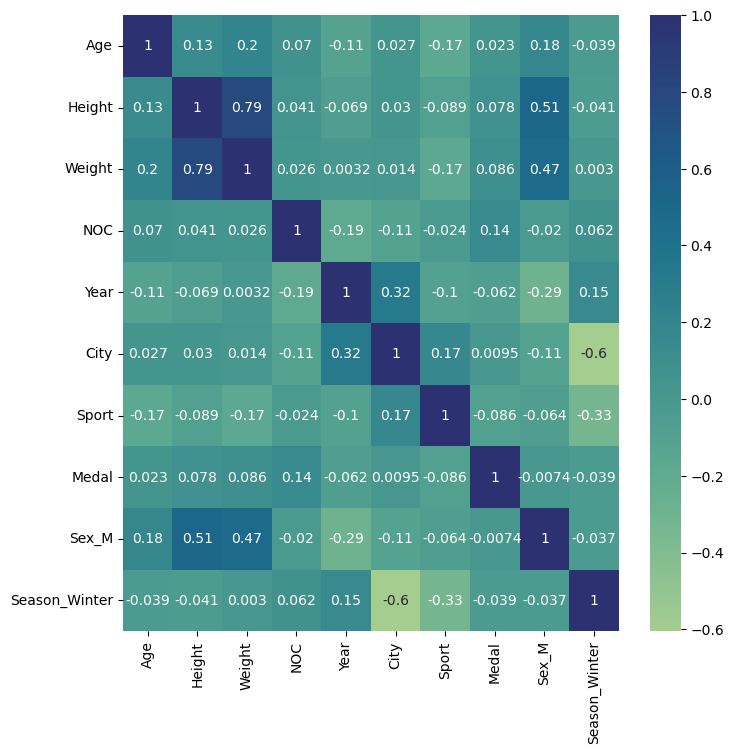

In [446]:
plt.figure(figsize=(8,8))
sns.heatmap(encoded_data.corr(), annot=True, cmap="crest")

There is no unexpected correlation between variables

## Split data

In [447]:
y = encoded_data['Medal']
x = encoded_data.drop(['Medal'],axis=1)

In [448]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, stratify= y_train, random_state=42)

In [449]:
x_tr.shape, x_val.shape, x_test.shape, y_tr.shape, y_val.shape, y_test.shape

((173513, 9), (43379, 9), (54224, 9), (173513,), (43379,), (54224,))

# Build model

## CatBoost Model

In [450]:
cat_features = ['Sex_M','City','Season_Winter','Sport','NOC']

In [451]:
train_pool = Pool(data = x_train, label = y_train, cat_features = cat_features)
tr_pool = Pool(data = x_tr, label = y_tr, cat_features = cat_features)
val_pool = Pool(data = x_val, label = y_val, cat_features = cat_features)
test_pool = Pool(data = x_test, label = y_test, cat_features = cat_features)

### Grid search

In [452]:
# # GRID SEARCH TAKES A LOT OF TIME TO RUN. IT CAN BE SKIPPED
# cat = CatBoostClassifier(cat_features = cat_features, logging_level = 'Silent', random_state = 42, auto_class_weights = 'Balanced')

# cat_grid = {'learning_rate': [0.06, 0.08, 0.1], 
#         'depth': [6, 8, 10], 
#         'l2_leaf_reg': [3, 5, 7], 
#         'n_estimators':[600, 800, 1000]} 

# grid_search_cat_result = cat.grid_search(cat_grid, tr_pool, partition_random_seed = 42, cv = 5, refit = False, plot = True, plot_file='grid_search_cat_result.html')

In [453]:
# # extract best hyperparameter set from grid search
# best_params = grid_search_cat_result['params']

# # update the parameter set in CBRegeressor object with best hyperparameter 
# cat.set_params(**best_params)

# cat.fit(tr_pool, eval_set = val_pool,plot=True, plot_file = 'training_progress_cat.html');

In [454]:
# auto_class_weights = 'Balanced'
cat = CatBoostClassifier(cat_features = cat_features, logging_level = 'Silent', random_state = 42,
                         iterations = 1000, depth = 8, learning_rate = 0.08, l2_leaf_reg = 7)

cat.fit(tr_pool, eval_set = val_pool,plot=True, plot_file = 'training_progress_cat.html');

In [455]:
# save model
cat.save_model(fname='catboost')

In [456]:
# load model
cat = CatBoostClassifier()
cat.load_model('catboost');

In [457]:
def cm(model_object, x, y):
    y_pred = model_object.predict(x)
   
    # Compute values for confusion matrix
    matrix = confusion_matrix(y, y_pred, labels = model_object.classes_)

    # Create display of confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = model_object.classes_)

    # Plot confusion matrix
    disp.plot(values_format = '')

    # Display plot
    plt.show()

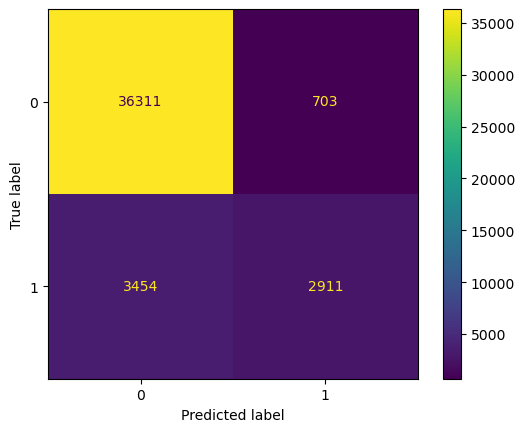

In [458]:
cm(cat,x_val,y_val)

- The upper-left quadrant displays the number of true negatives.
- The upper-right quadrant displays the number of false positives.
- The bottom-left quadrant displays the number of false negatives.
- The bottom-right quadrant displays the number of true positives.

- True negatives: The number of people who did not win medal that the model accurately predicted did not win.
- False positives: The number of people who did not win medal the model inaccurately predicted as losing.
- False negatives: The number of people who win medal that the model inaccurately predicted did not win
- True positives: The number of people who win medal the model accurately predicted as winning


In [459]:
def print_result(model_name,model_object,x,y):
    y_pred = model_object.predict(x)
    auc = roc_auc_score(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred)
    precision = precision_score(y, y_pred)
    f1 = f1_score(y, y_pred)

    result_df = pd.DataFrame({'Model': [model_name], 'Precision': [precision], 'Recall': [recall], 'F1': [f1], 'Accuracy': [accuracy], 'AUC': [auc]})
    return result_df

In [460]:
catboost_result = print_result('CatBoost',cat,x_val,y_val)
catboost_result

,Model,Precision,Recall,F1,Accuracy,AUC
0,CatBoost,0.805479,0.457345,0.583425,0.90417,0.719176


In [461]:
# save table as csv
catboost_result.to_csv("results.csv",index=False)

## Decission Tree

In [462]:
# # class_weight ='balanced'
# tree = DecisionTreeClassifier(random_state=42,criterion='log_loss')

# dt_grid = {'max_depth':[4, 6, 8, None],
#            'min_samples_leaf': [1, 3, 5],
#            'min_samples_split': [2, 4, 6]
#            }

# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# tree = GridSearchCV(tree, dt_grid, scoring=scoring, cv=5, refit='roc_auc')

In [463]:
# best hyperparameter set of the grid search: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}
tree = DecisionTreeClassifier(random_state=42,criterion='log_loss',max_depth = None, min_samples_leaf= 5, min_samples_split= 2)
tree.fit(x_tr, y_tr)

In [464]:
def write_pickle(model_object, file_name:str):
    with open(file_name, 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [465]:
def read_pickle(file_name:str):
    with open(file_name, 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [466]:
file_name = 'tree.pickle'
write_pickle(tree,file_name)

In [467]:
tree = read_pickle(file_name)

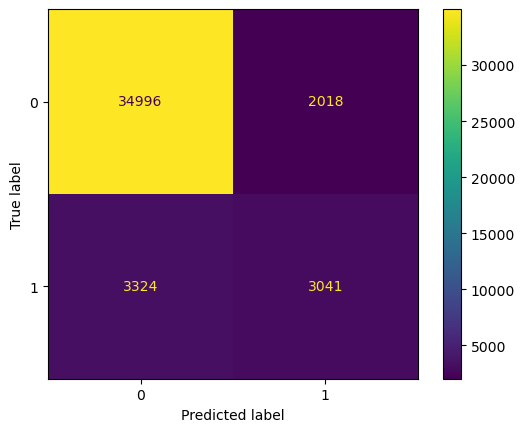

In [468]:
cm(tree,x_val,y_val)

In [469]:
tree_result = print_result('Decision Tree',tree,x_val,y_val)
tree_result

,Model,Precision,Recall,F1,Accuracy,AUC
0,Decision Tree,0.601107,0.477769,0.532388,0.876853,0.711625


In [470]:
# function to save result
def save_result(result_df):
    results = pd.read_csv('results.csv')
    results = pd.concat([result_df, results])
    results.to_csv("results.csv",index=False)
    return results

In [471]:
save_result(tree_result)

,Model,Precision,Recall,F1,Accuracy,AUC
0,Decision Tree,0.601107,0.477769,0.532388,0.876853,0.711625
0,CatBoost,0.805479,0.457345,0.583425,0.904170,0.719176


{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

## Random forest

In [472]:
# Grid Search
# rf = RandomForestClassifier(random_state=42)

# rf_grid = {'max_depth': [3, 5, None], 
#              'max_features': [1.0],
#              'max_samples': [0.7, 1.0],
#              'min_samples_leaf': [1,2,3],
#              'min_samples_split': [2,3,4],
#              'n_estimators': [300, 500],
#              }  

# scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# rf = GridSearchCV(rf, rf_grid, scoring=scoring, cv=5, refit='roc_auc')

In [473]:
# best hyperparameter set of the grid search: max_depth=None,max_features=1.0,max_samples=1.0,min_samples_leaf=3,min_samples_split=2,n_estimators=500
rf = RandomForestClassifier(random_state=42,max_depth=None,max_features=1.0,max_samples=1.0,min_samples_leaf=3,min_samples_split=2,n_estimators=500)
rf.fit(x_tr, y_tr)

In [474]:
file_name = 'forest.pickle'
write_pickle(rf,file_name)

In [475]:
rf = read_pickle(file_name)

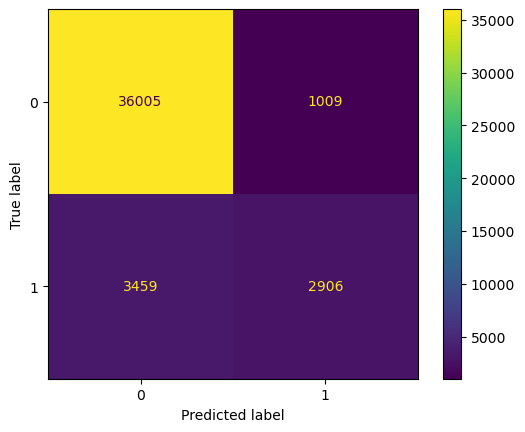

In [476]:
cm(rf,x_val,y_val)

In [477]:
forest_result = print_result('Random Forest',rf,x_val,y_val)
forest_result

,Model,Precision,Recall,F1,Accuracy,AUC
0,Random Forest,0.742273,0.456559,0.56537,0.897001,0.71465


In [478]:
save_result(forest_result)

,Model,Precision,Recall,F1,Accuracy,AUC
0,Random Forest,0.742273,0.456559,0.565370,0.897001,0.714650
0,Decision Tree,0.601107,0.477769,0.532388,0.876853,0.711625
1,CatBoost,0.805479,0.457345,0.583425,0.904170,0.719176


Catboost model performs the best. I will keep it as champion model

In [479]:
# test catboost model on test datasset
print_result('Test',cat,x_test,y_test)

,Model,Precision,Recall,F1,Accuracy,AUC
0,Test,0.797543,0.456956,0.581016,0.90329,0.718503


## Feature importance

In [480]:
# get feature importance
feature_importance = cat.get_feature_importance()
feature_names = x_train.columns 

# create a DataFrame 
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print the feature importance
print(importance_df)

         Feature  Importance
6          Sport   30.663025
3            NOC   26.010789
5           City   13.039669
4           Year    7.677764
1         Height    5.926590
0            Age    5.805014
2         Weight    5.718117
7          Sex_M    4.792062
8  Season_Winter    0.366971


Sport, NOC, City have the highest importance, in that order. These variables are most helpful in predicting the outcome variable that athletes wins medal.

# Conclusion

Catboost model achieved a precision of 80%, recall of 47%, f1-score of 58% and accuracy of 90%. This result is not unexpected because the dataset is quite imbalanced. Imbalance can lead to biased predictions, where the classifier tends to predict the majority class (who is not medal winner) more often, neglecting the minority class (wo is medal winner). If the goal is to predict medal winner, then the model can be customized in 2 ways
- Can use resampling for a more balanced training data, so that the minority class can be better represented
- Apple class weight on the model so that it focuses more on predicting the underrepresented class